# AST 7939 Homework Assignment #1 (10 pts)

## All work is due Wednesday February 8 at 5 pm.

## Instruction: 
Do all homework in this Jupyter notebook and submit your final .ipynb file via Canvas. Show ALL your work and add comments to describe what your code does. 

You are encouraged to discuss homework problems with your classmates. However, your python script and answers to the questions must be written by yourself.

## 1. Curse of dimensionality (4 pts)

We learned that kNN suffers from the curse of dimensionality. In class, we estimated the size of a hypercube that includes $k$ nearest neighbors as a function of dimension and number of data points. In this homework, let's look into this problem in a more quantitative way by following the steps below. 

(a) Make six $D$-dimensional numpy arrays, where $D = 1, 2, 5, 10, 100,$ and $1000$. Each array contains $n=10^4$ data points that are randomly distributed in the $D$-dimensional space (hint: use np.random.rand). Let's assume that the side of each hypercube ranges from 0 to 1, so the volume of hypercubes is 1. (1 pt)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
N = 10000 #number of data points
#dimension of each array:
d1 = 1
d2 = 2
d5 = 5
d10 = 10
d100 = 100
d1000 = 1000

# Make 6 D-dimensional arrays,
# random.rand populates an array with random sample uniformly distributed over [0,1)
D1 = np.random.rand(N, d1)
D2 = np.random.rand(N, d2)
D5 = np.random.rand(N, d5)
D10 = np.random.rand(N, d10)
D100 = np.random.rand(N, d100)
D1000 = np.random.rand(N, d1000)

#print(D1000.shape)

(10000, 1000)


(b) For each array, compute the distance between each data points. Since you have $10^4$ data points in each array, you need to compute distance total $(10,000 \times 9,999)/2 = 49,995,000$ times. There could be faster ways to do this computation, but I found ``distance_matrix`` from ``scipy.spatial`` does a decent job. Once you computed all the distance, normalize them by the maximum possible distance in each hypercube, that is $\sqrt{D}$. (1 pt)


In [39]:
from scipy.spatial import distance_matrix

In [54]:
# Compute the distance between each data points and normalize by the maximum possible distance
dist1 = distance_matrix(D1, D1)/np.sqrt(d1)
dist2 = distance_matrix(D2, D2)/np.sqrt(d2)
dist5 = distance_matrix(D5, D5)/np.sqrt(d5)
dist10 = distance_matrix(D10, D10)/np.sqrt(d10)
dist100 = distance_matrix(D100, D100)/np.sqrt(d100)
dist1000 = distance_matrix(D1000, D1000)/np.sqrt(d1000)


#dist1000.shape

(10000, 10000)

(c) In a single figure, plot six histograms (one for each array) showing the number of counts on the y axis vs. normalized distance between data points on the x axis. Make sure that your figure is readble. Also, label them properly so that readers can understand what the figure shows. (1 pt)


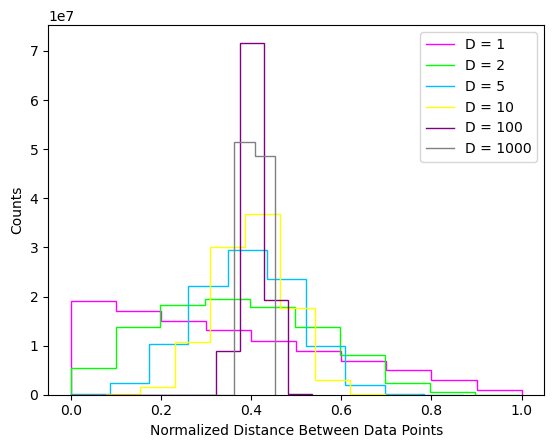

In [96]:
#plt.hist() wasn't working for me so I did it a more manual way
counts, bins = np.histogram(dist1)
plt.stairs(counts, bins, fill=False, color='fuchsia', label='D = '+str(d1))
counts, bins = np.histogram(dist2)
plt.stairs(counts, bins, fill=False, color='lime', label='D = '+str(d2))
counts, bins = np.histogram(dist5)
plt.stairs(counts, bins, fill=False, color='deepskyblue', label='D = '+str(d5))
counts, bins = np.histogram(dist10)
plt.stairs(counts, bins, fill=False, color='yellow', label='D = '+str(d10))
counts, bins = np.histogram(dist100)
plt.stairs(counts, bins, fill=False, color='purple', label='D = '+str(d100))
counts, bins = np.histogram(dist1000)
plt.stairs(counts, bins, fill=False, color='grey', label='D = '+str(d1000))


plt.legend()
plt.xlabel('Normalized Distance Between Data Points')
plt.ylabel('Counts');



(d) Discuss what you see in the figure in the context of kNN. (1 pt)

**For smaller dimensions (D < 5), the distances are well spread out between 0-1. But for higher dimensions (D > 10) the distances are less spread out and there is an obvious accumulation at distance ~ 0.4. This explains why kNN breaks down at higher dimensions (i.e. the curse of dimensionality) since at lower dimensions there is a larger distribution of distances but at higher dimensions the distance start to converge towards one value. This is why there are no true "neighbors" at higher dimensions, all the data points are at a similar distance to each other.**








## 2. Classifying objects in SDSS data using kNN and decision tree (6 pts)

SDSS.csv contains various information on 150,000 stars, galaxies, and quasars, including ugriz magnitudes and redshift. Let's build kNN and DT models based on this dataset. You may want to use pandas to read in the data (https://pandas.pydata.org/).

(a) Read in the data. Using the provided ugriz magnitudes, compute and store u-g, g-r, r-i, i-z colors for each object. (1 pt)

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn import neighbors

In [5]:
# Read in the data
table = pd.read_csv('SDSS.csv')

# Take a look at the data
display(table)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237655107828973746,138.937318,49.779249,17.32152,16.28594,15.88471,15.66384,15.46604,2243,301,3,152,862475375345690624,GALAXY,0.028514,766,52247,131
1,1237678584114511952,31.594644,22.451246,18.13019,17.47997,16.97868,16.75768,16.83714,7709,301,3,65,2303710287351539712,QSO,1.694959,2046,53327,433
2,1237680298881122360,333.991221,19.977552,18.94798,18.80473,18.75522,18.72968,18.66552,8108,301,5,79,8532228490187264000,QSO,2.046520,7578,56956,578
3,1237650761319514319,186.201096,-2.808180,19.22969,18.04638,17.37830,16.99285,16.76479,1231,301,3,113,376103378880587776,GALAXY,0.000000,334,51993,192
4,1237648722280317126,124.814240,0.651496,18.76061,17.28682,16.74055,16.55152,16.45902,756,301,5,60,2316149895234349056,STAR,0.000196,2057,53816,632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1237673758185554973,100.889697,29.106283,19.17071,18.21106,17.80099,17.63203,17.53079,6585,301,6,121,3013004977846118400,STAR,0.000160,2676,54179,352
149996,1237671262268752282,124.964450,9.635759,19.38253,17.49415,16.55436,16.13420,15.80408,6004,301,5,61,2728125362876737536,GALAXY,0.110984,2423,54149,254
149997,1237673756573762584,98.821075,26.946457,18.90948,17.73591,17.31252,17.16612,17.07103,6585,301,3,103,3035579600630474752,STAR,0.000097,2696,54167,558
149998,1237678877782966354,320.766012,9.993010,17.63177,16.10855,15.35884,15.21912,15.11279,7777,301,6,66,821986413082863616,STAR,-0.000218,730,52466,289


In [6]:
table['class'] #labels

0         GALAXY
1            QSO
2            QSO
3         GALAXY
4           STAR
           ...  
149995      STAR
149996    GALAXY
149997      STAR
149998      STAR
149999    GALAXY
Name: class, Length: 150000, dtype: object

In [7]:
# Compute colors for each object
u_g = table['u'] - table['g']
g_r = table['g'] - table['r']
r_i = table['r'] - table['i']
i_z = table['i'] - table['z']

# Store other features into variables
u = table['u']
g = table['g']
r = table['r']
i = table['i']
z = table['z']
redshift = table['redshift']

#print(i_z.shape)

(b) Make kNN models. Vary $k$ from 1 to 30 and make a figure showing training/test accuracy vs. $k$. What is the optimal $k$ that results in the highest test accuracy? Use u, g, r, i, z magnitudes, u-g, g-r, r-i, i-z colors, and redshift as features -- so you have a 10-dimensional dataset. (1 pt)

In [8]:
from sklearn.model_selection import train_test_split

# Make array of target and feature names
target_names = np.array(['QSO', 'GALAXY', 'STAR']) 
feature_names = ['u','g','r','i','z','u-g','g-r','r-i','i-z','redshift']

# Features in "X" (matrix), label in "y" (vector)
X = np.array([u, g, r, i, z, u_g, g_r, r_i, i_z, redshift]).T
y = np.expand_dims(table['class'], axis=1)

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
# double check that things make sense
target_names, target_names.shape

(array(['QSO', 'GALAXY', 'STAR'], dtype='<U6'), (3,))

In [16]:
# double check that things make sense
feature_names, type(feature_names)

(['u', 'g', 'r', 'i', 'z', 'u-g', 'g-r', 'r-i', 'i-z', 'redshift'], list)

In [15]:
# double check that things make sense
X, X.shape, type(X)

(array([[ 1.732152e+01,  1.628594e+01,  1.588471e+01, ...,  2.208700e-01,
          1.978000e-01,  2.851393e-02],
        [ 1.813019e+01,  1.747997e+01,  1.697868e+01, ...,  2.210000e-01,
         -7.946000e-02,  1.694959e+00],
        [ 1.894798e+01,  1.880473e+01,  1.875522e+01, ...,  2.554000e-02,
          6.416000e-02,  2.046520e+00],
        ...,
        [ 1.890948e+01,  1.773591e+01,  1.731252e+01, ...,  1.464000e-01,
          9.509000e-02,  9.695849e-05],
        [ 1.763177e+01,  1.610855e+01,  1.535884e+01, ...,  1.397200e-01,
          1.063300e-01, -2.175624e-04],
        [ 1.917574e+01,  1.770970e+01,  1.685068e+01, ...,  4.342100e-01,
          2.669100e-01,  1.748774e-01]]),
 (150000, 10),
 numpy.ndarray)

In [12]:
# double check that things make sense
y.shape

(150000, 1)

In [15]:
# double check that things make sense
X_train.shape, X_test.shape

((112500, 10), (37500, 10))

In [13]:
# Perform feature scaling
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit(X_train).transform(X_train)
X_test_scaled = StandardScaler().fit(X_train).transform(X_test)

In [58]:
# Now I'm going to do what the question asked

train_acc = []
test_acc = []

# Vary k neighbors between 1-30
for k in range(1,31,1):
    
    # Create the model
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    # Fit the training data to the model
    model.fit(X_train_scaled, y_train)
    
    # Compute accuracy of training dataset and testing dataset
    train_acc.append(model.score(X_train_scaled, y_train))
    test_acc.append(model.score(X_test_scaled, y_test))

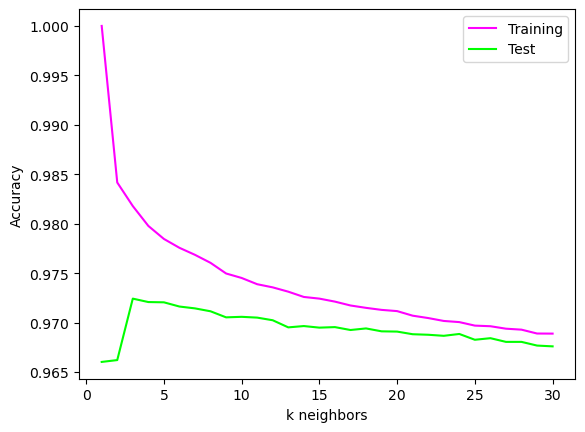

In [59]:
# Plotting
kvalues = range(1,31,1) #same as above

plt.plot(kvalues, train_acc, label='Training', color='fuchsia')
plt.plot(kvalues, test_acc, label='Test', color='lime')

plt.legend()
plt.xlabel('k neighbors')
plt.ylabel('Accuracy');

In [60]:
# Find the optimal k 
print('Best Test Score = ', np.amax(np.array(test_acc)))
print('Index = ', np.argmax(np.array(test_acc))+1) # +1 because python indexing starts at 0

Best Test Score =  0.9724266666666667
Index =  3


**k = 3 is the optimal number of neighbors that results in the highest test accuracy.**

(c) Make DT models. Vary max_depth from 1 to 30 and make a figure showing training/test accuracy vs. max_depth. What is the optimal max_depth that results in the highest test accuracy? Again, use u, g, r, i, z magnitudes, u-g, g-r, r-i, i-z colors, and redshift as features.(1 pt)

In [61]:
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeClassifier, plot_tree

train_acc = []
test_acc = []

for max_depth in range(1,31,1):
    
    # Create the model
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    # Training
    model.fit(X_train, y_train)

    # Compute accuracy
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

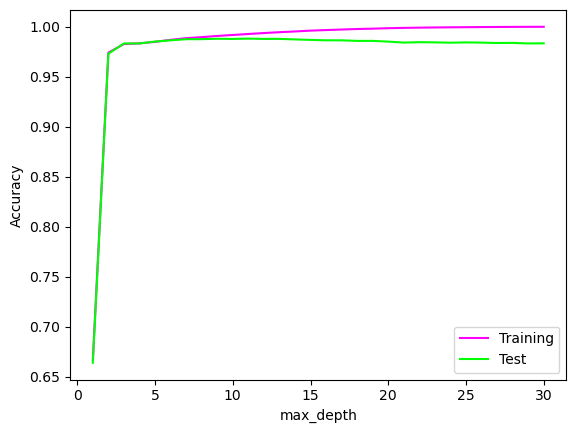

In [62]:
max_depth = range(1,31,1)

plt.plot(max_depth, train_acc, label='Training', color='fuchsia')
plt.plot(max_depth, test_acc, label='Test', color='lime')

plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Accuracy');

In [63]:
#Find the optimal max_depth
print('Best Test Score = ', np.amax(np.array(test_acc)))
print('Index = ', np.argmax(np.array(test_acc))+1) # +1 because python indexing starts at 0

Best Test Score =  0.9881333333333333
Index =  11


**max_depth = 11 is the optimal value for the highest test accuracy**

(d) For your best decision tree model, which features are the most important? (1 pt)

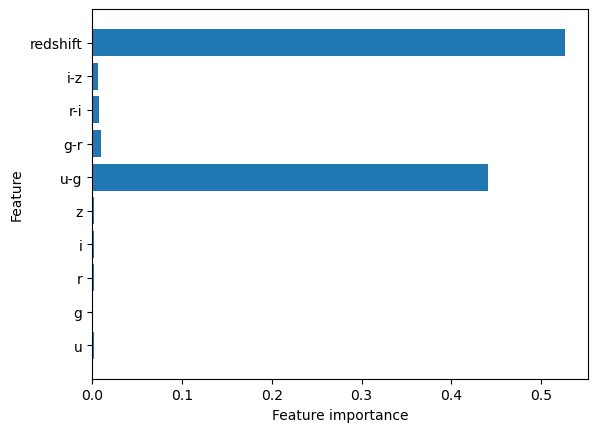

In [179]:
# Determine the most important feature (plot_feature_importances() is from Week 2 workbook)
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(model)

**There are 2 features that are the most important: redshift and u-g color.**

(e) SDSS_evaluation.csv contains another 150,000 stars, galaxies, and quasars. Using the best kNN and decision tree models you obtained, make predictions for this new dataset and compute the accuracy. (1 pt)

In [4]:
# Read in the new data
new_table = pd.read_csv('SDSS_evaluation.csv')
new_table

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666210854536279,267.693275,25.382464,21.43812,20.14254,19.53728,19.27723,19.11268,4828,301,4,125,2470235456227272704,STAR,-0.000848,2194,53904,40
1,1237661958293029652,195.497352,51.631548,23.92653,22.86720,21.38509,20.37984,19.71321,3838,301,3,18,9258422668042194944,GALAXY,0.645810,8223,57429,537
2,1237660961328399002,137.277106,33.357736,21.32821,21.11290,19.40331,18.65184,18.21766,3606,301,2,89,6542733657546969088,QSO,1.788380,5811,56334,470
3,1237678858479272458,17.874748,11.723564,22.02962,21.37774,21.52691,21.45392,20.66333,7773,301,2,427,5254744288475238400,QSO,2.134945,4667,55868,616
4,1237680272040461216,343.158072,20.848515,22.80926,22.97740,21.88842,20.83235,20.04866,8102,301,3,123,8567048099343912960,GALAXY,0.730557,7609,56959,275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1237678879951159742,9.766930,-3.015522,23.65226,21.61961,20.13433,19.37306,18.93905,7778,301,2,382,4919149974368047104,GALAXY,0.510960,4369,55827,339
149996,1237678879959089467,27.855484,-2.793334,22.06322,22.34275,20.57937,19.61827,18.98400,7778,301,2,503,4895474185990852608,GALAXY,0.536282,4348,55559,223
149997,1237655109452955889,190.707871,60.870616,24.53051,21.30150,19.53934,18.75113,18.30253,2243,301,6,356,7701346515105894400,GALAXY,0.456249,6840,56685,695
149998,1237667731809632287,132.411868,14.917552,19.19523,18.88476,18.85863,18.95066,18.98802,5182,301,5,122,2737136404868917248,STAR,0.000181,2431,53818,268


In [19]:
# Get the features for the new data
u_g_new = new_table['u'] - new_table['g']
g_r_new = new_table['g'] - new_table['r']
r_i_new = new_table['r'] - new_table['i']
i_z_new = new_table['i'] - new_table['z']

# Other features
u_new = new_table['u']
g_new = new_table['g']
r_new = new_table['r']
i_new = new_table['i']
z_new = new_table['z']
redshift_new = new_table['redshift']

# Combine features into one large data array
new_data = np.array([u_new, g_new, r_new, i_new, z_new, u_g_new, g_r_new, r_i_new, i_z_new, redshift_new]).T

# Labels for the new data
y_new = new_table['class']


In [10]:
new_data.shape

(150000, 10)

In [22]:
new_data_scaled = StandardScaler().fit(X_train).transform(new_data)
new_data_scaled
#not sure why this isn't working, just going to skip this step

array([[ 3.42356637,  2.23435803,  1.75592906, ...,  0.17888524,
         0.13442487, -0.63074701],
       [ 6.53723043,  4.75653282,  3.21025733, ...,  2.97993349,
         1.97380654,  0.2982735 ],
       [ 3.28603967,  3.13260498,  1.65048729, ...,  2.02602846,
         1.1222206 ,  1.93974267],
       ...,
       [ 7.29297037,  3.30718902,  1.75755039, ...,  2.16412631,
         1.1750486 ,  0.02594083],
       [ 0.61711325,  1.07005092,  1.22179412, ..., -1.14450857,
        -0.60527708, -0.62926735],
       [ 7.83540691,  2.6602746 ,  1.16263119, ...,  2.62262317,
         1.31492191, -0.62933444]])

In [23]:
# Create the kNN model with 3 neighbors as determined in part b
model = neighbors.KNeighborsClassifier(n_neighbors=3)
# Fit the training data to the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
# Make predictions for the new data
print('kNN model with k=3 neighbors: ')
predictions = model.predict(new_data_scaled)
print('Predictions = ', predictions)

# Determine accuracy
accuracy = model.score(new_data_scaled, y_new) #kinda confused about how we would do this for data that doesn't come with labels
print('Accuracy = ', accuracy)

kNN model with k=3 neighbors: 
Predictions =  ['GALAXY' 'QSO' 'QSO' ... 'GALAXY' 'STAR' 'GALAXY']
Accuracy =  0.6848666666666666


In [26]:
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeClassifier, plot_tree

# Create the Decision Tree model with max_depth=11 as determined in part c
model = DecisionTreeClassifier(max_depth=11, random_state=0)
# Fit the training data to the model
model.fit(X_train, y_train) # Be consistent with scaled or unscaled between training and testing

DecisionTreeClassifier(max_depth=11, random_state=0)

In [27]:
print('Decision Tree model with max_depth=10: ')
# Make prediction for the new data
predictions = model.predict(new_data_scaled)
print('Predictions = ', predictions)

# Determine accuracy
accuracy = model.score(new_data_scaled, y_new)
print('Accuracy = ', accuracy)

Decision Tree model with max_depth=10: 
Predictions =  ['STAR' 'QSO' 'QSO' ... 'STAR' 'STAR' 'GALAXY']
Accuracy =  0.5352866666666667


**Accuracy is < 70% for both the kNN and Decision Tree model.**

(f) You should have gotten poor performance from your kNN and decision tree models unless you did some magic. Have a look at the your training/evaluation datasets and discuss what might have caused the poor performace. (1 pt)

**The dimension is probably way too high, with 10 features my model is likely struggling due to the curse of dimensionality. Additionally, upon further visual inspection of the data (see below) there seems to be a lot of overlap in the training data for redshifts between 0-1. The overlapping is probably making it harder for my models to make accurate predictions at the locations of overlap.**








**More correctly, the two data sets cover very different u-g and redshift ranges. You can tell if you plot original data next to new evaluation data**

In [38]:
# For plotting I need to get labels into 0,1,2 instead of 'STAR', 'GALAXY', 'QSO'

target = []*len(y_train) #empty list
i = 0

while i < len(y_train):
    
    if y_train[i] == 'STAR':
        target.append(0) # 0 = STAR
        
    if y_train[i] == 'GALAXY':
        target.append(1) # 1 = GALAXY
        
    if y_train[i] == 'QSO':
        target.append(2) # 2 = QSO
        
    i = i+1


In [39]:
print(y_train)
print(target)

[['QSO']
 ['STAR']
 ['STAR']
 ...
 ['QSO']
 ['STAR']
 ['QSO']]
[2, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 2, 0, 2, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 0, 1, 0, 2, 2, 2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2, 1, 0, 0, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 

In [44]:
# Do the same for test data set
target_test = []*len(y_test)
i = 0

while i < len(y_test):
    
    if y_test[i] == 'STAR':
        target_test.append(0)
        
    if y_test[i] == 'GALAXY':
        target_test.append(1)
        
    if y_test[i] == 'QSO':
        target_test.append(2)
        
    i = i+1


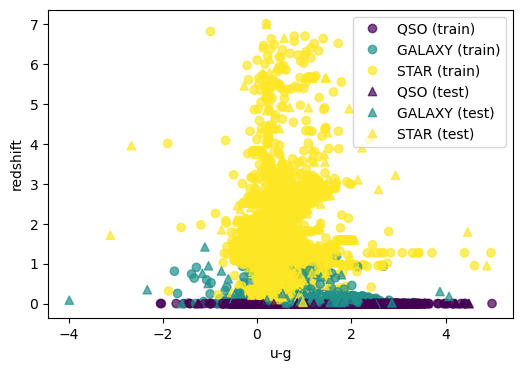

In [48]:
#Try to visualize what's going on with the two most important features as determined in part d

fig, ax = plt.subplots(figsize=(6,4))

norm=plt.Normalize(vmin=0, vmax=2)

plot = ax.scatter(X_train[:,5], X_train[:,9], alpha=0.7, c=target, cmap='viridis', norm=norm)
plot_test = ax.scatter(X_test[:,5], X_test[:,9], alpha=0.7, c=target_test, cmap='viridis', norm=norm, marker='^')


ax.set(xlabel=feature_names[5], ylabel=feature_names[9])

#ax.legend(plot.legend_elements()[0], target_names);

ax.legend(plot.legend_elements()[0] + plot_test.legend_elements()[0], 
         ['QSO (train)', 'GALAXY (train)', 'STAR (train)']
         + ['QSO (test)', 'GALAXY (test)', 'STAR (test)']);



In [49]:
# I'm curious how many data points we have in each group
i = 0
x=0
y=0
z=0

for i in target:
    
    if i == 0:
        x = x+1
        
    if i == 1:
        y = y+1
        
    if i == 2:
        z = z+1

print('Training:')
print('0s: ', x, '1s: ', y, '2s', z) 
# Looks pretty evenly distributed

Training:
0s:  37540 1s:  37430 2s 37530


In [51]:
# I'm curious how many data points we have in each group
i = 0
x=0
y=0
z=0

for i in target_test:
    
    if i == 0:
        x = x+1
        
    if i == 1:
        y = y+1
        
    if i == 2:
        z = z+1

print('Testing')
print('0s: ', x, '1s: ', y, '2s', z) 

Testing
0s:  12460 1s:  12570 2s 12470
